In [47]:
%matplotlib inline


In [48]:
!pip install pandas
!pip install seaborn
!pip install dython
!pip install gower
!pip install scipy
!pip install plotting

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the

In [49]:
import sys
!{sys.executable} -m pip install --upgrade pandas

# LIBRARIES

In [50]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz, plot_tree

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split



# IMPORTATION DES DONNEES

In [51]:
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv',error_bad_lines=False )

In [52]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [53]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Il ne manque aucune donnée a notre dataset : aucune valeur "null" ne resort

In [54]:
data.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [55]:
data.MTRANS.unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

# DATA-VISUALISATION

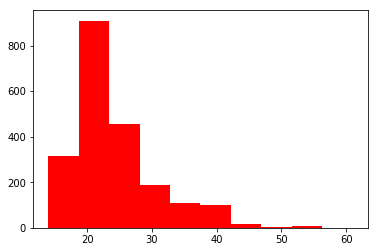

In [56]:
plt.hist(data.Age, color="red")
plt.show()

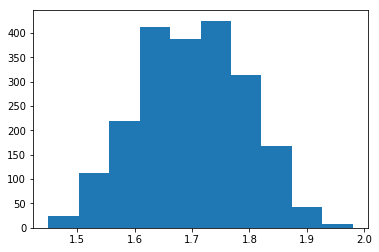

In [57]:
plt.hist(data.Height)
plt.show()

Beaucoup de personnes ont la 20ène

Text(0.5, 0.98, 'Variables')

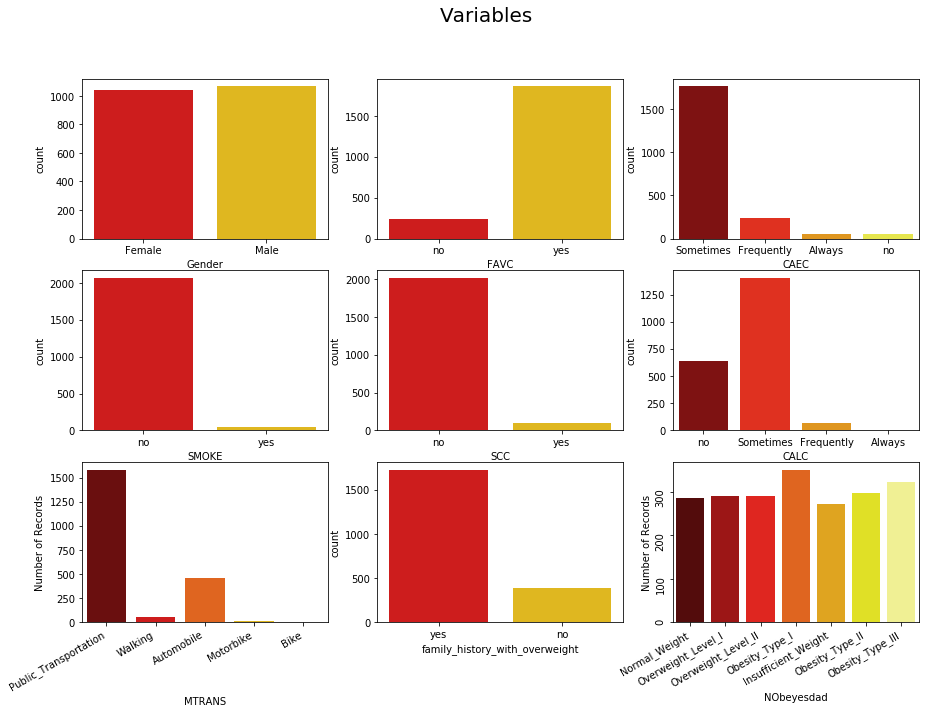

In [58]:
columns = ['Gender', 'FAVC', 'CAEC', 'SMOKE',
           'SCC', 'CALC', 'MTRANS','family_history_with_overweight', 'NObeyesdad']

fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(data[col], ax=subplot,palette="hot")
    plt.xticks(rotation=90)
    plt.yticks(rotation=90)
    
    if col=="NObeyesdad":
        subplot.set_xticklabels(rotation=30, horizontalalignment='right',labels=data.NObeyesdad.unique())  
        subplot.yaxis.label.set_text("Number of Records") 
        
    elif col=="MTRANS":
        subplot.set_xticklabels(rotation=30, horizontalalignment='right', labels=data.MTRANS.unique())  
        subplot.yaxis.label.set_text("Number of Records")     
        
        
fig.suptitle("Variables", fontsize=20)


Le poids et les sexes sont répartis de manière uniforme.
Parmi les personnes participant à l'enquête, beaucoup ont des antécédents familiaux, se laisse aller sur l'alcool, prennent les transports en commun et ne fument pas.

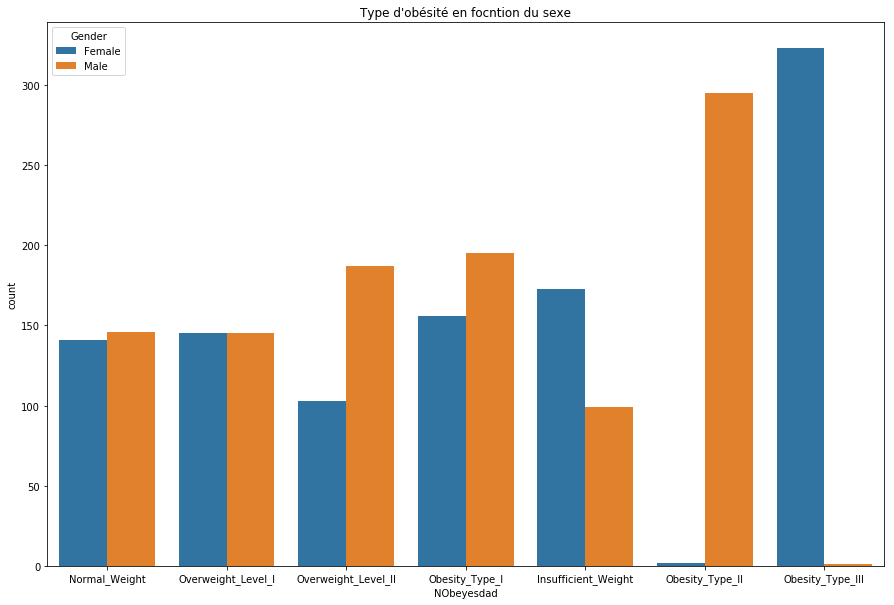

In [59]:
plt.figure(figsize=(15,10)) 
sns.countplot(data = data, x="NObeyesdad", hue="Gender")
plt.title("Type d'obésité en focntion du sexe")
plt.show()

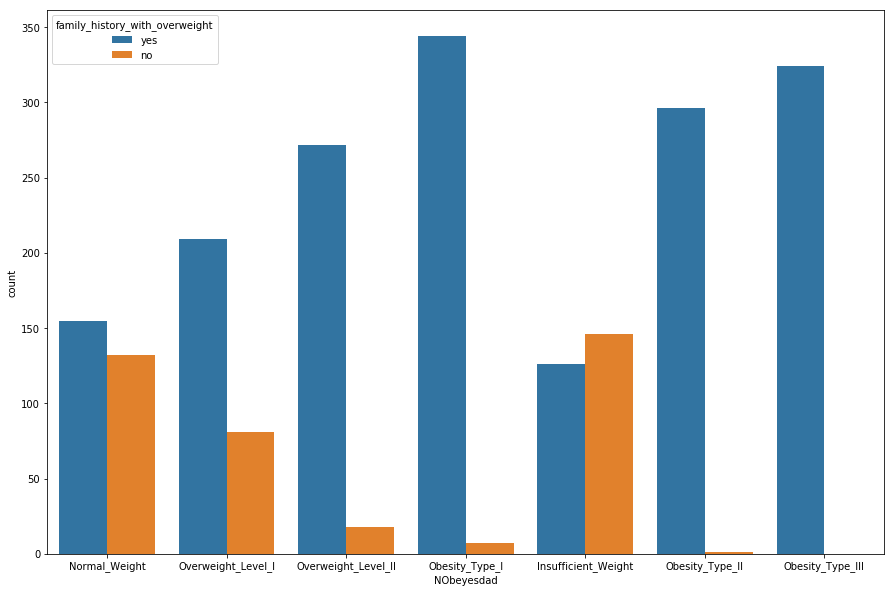

In [60]:
plt.figure(figsize=(15,10)) 
sns.countplot(data = data, x="NObeyesdad", hue="family_history_with_overweight")
plt.show()

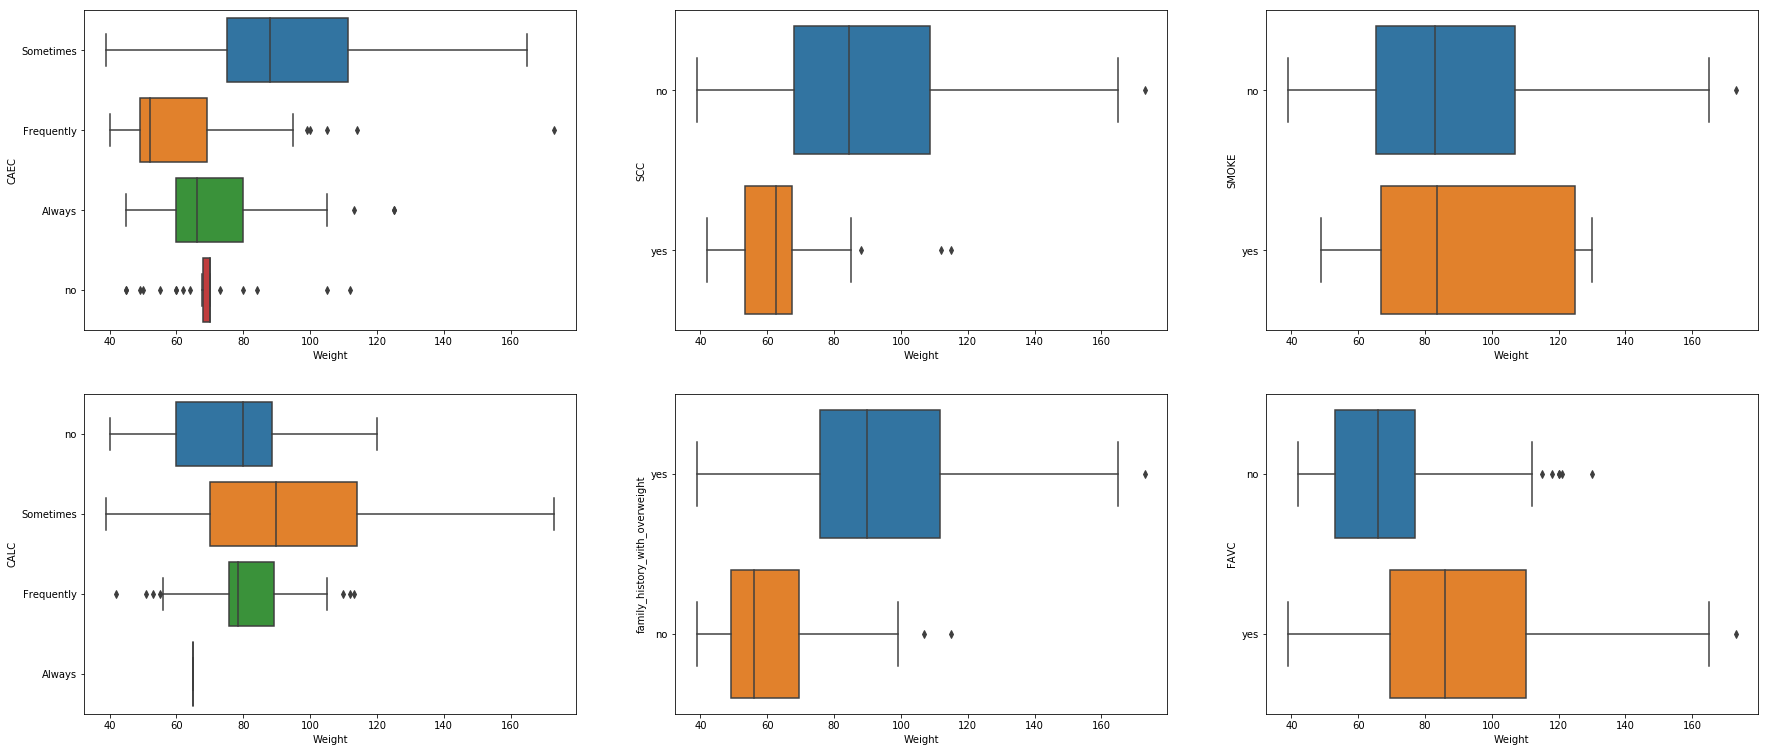

In [61]:
columns = ['CAEC','SCC','SMOKE','CALC','family_history_with_overweight','FAVC']
plt.figure(figsize=(30, 20))
for i in range(len(columns)):
    plt.subplot(331+i)
    sns.boxplot(x = 'Weight', y = columns[i], data = data)

/Users/galfout/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


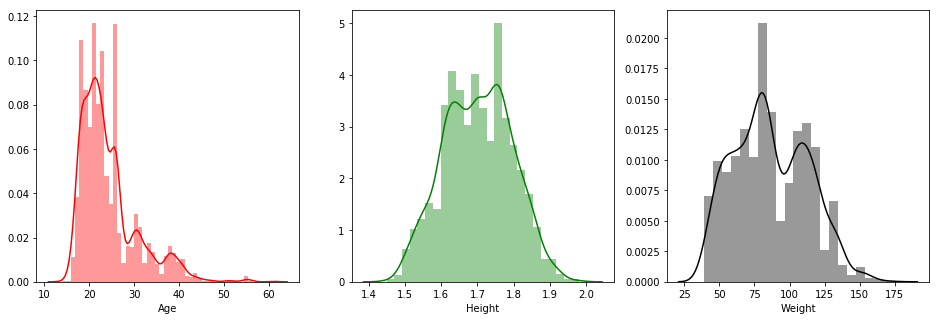

In [62]:
plt.figure(figsize=(16,5))
plt.subplot(131)
sns.distplot(data["Age"],kde=True, color = "red")
plt.subplot(132)
sns.distplot(data["Height"], kde=True, color = "green")
plt.subplot(133)
sns.distplot(data["Weight"], kde=True, color = "black")


## Correlation Matrix


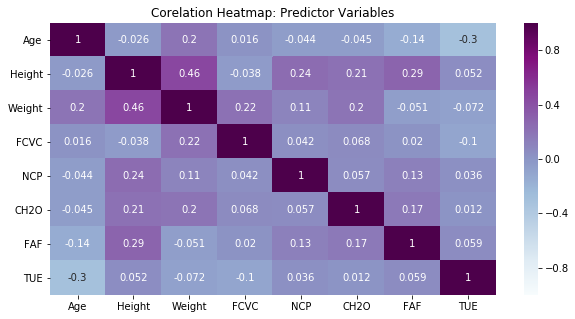

In [63]:
plt.figure(figsize=(10,5))
ax = sns.heatmap(data.corr(), cmap="BuPu", vmin=-1, vmax=1, annot=True).set_title('Corelation Heatmap: Predictor Variables');

# Preparation des données

NObeyesdad est défini à l'aide de la taille et du poids. 
Dans l'article ils indiquent que la formule utilisée est poids / (hauteur ^ 2).
Donc on va supprimer ces 2 colonnes


In [64]:
data=data.drop(columns=['Height','Weight'])
data.shape

(2111, 15)

Conversion des variables "catégorielles" en "catégorie"

In [65]:

columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]
for col in columns:
    data[col] = data[col].astype('category')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   float64 
 2   family_history_with_overweight  2111 non-null   category
 3   FAVC                            2111 non-null   category
 4   FCVC                            2111 non-null   float64 
 5   NCP                             2111 non-null   float64 
 6   CAEC                            2111 non-null   category
 7   SMOKE                           2111 non-null   category
 8   CH2O                            2111 non-null   float64 
 9   SCC                             2111 non-null   category
 10  FAF                             2111 non-null   float64 
 11  TUE                             2111 non-null   float64 
 12  CALC                

In [66]:
data['Age'] = round(data['Age']).astype(int)
data['FCVC'] = round(data['FCVC']).astype(int)
data['CH2O'] = round(data['CH2O']).astype(int)
data['FAF'] = round(data['FAF']).astype(int)
data['TUE'] = round(data['TUE']).astype(int)

In [67]:
data['CAEC'].replace(['Sometimes', 'Frequently', 'Always', 'no'],[1,2,3,0],inplace=True)
data['CALC'].replace(['Sometimes', 'Frequently', 'Always', 'no'],[1,2,3,0],inplace=True)
data['Gender'].replace(['Female', 'Male'],[0,1],inplace=True)
data['family_history_with_overweight'].replace(['yes', 'no'],[1,0],inplace=True)
data['FAVC'].replace(['yes', 'no'],[1,0],inplace=True)
data['SMOKE'].replace(['yes', 'no'],[1,0],inplace=True)
data['SCC'].replace(['yes', 'no'],[1,0],inplace=True)

In [68]:
data.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1,0,2,3.0,1,0,2,0,0,1,0,Public_Transportation,Normal_Weight
1,0,21,1,0,3,3.0,1,1,3,1,3,0,1,Public_Transportation,Normal_Weight
2,1,23,1,0,2,3.0,1,0,2,0,2,1,2,Public_Transportation,Normal_Weight
3,1,27,0,0,3,3.0,1,0,2,0,2,0,2,Walking,Overweight_Level_I
4,1,22,0,0,2,1.0,1,0,2,0,0,0,1,Public_Transportation,Overweight_Level_II


In [69]:
temporaire=dict(zip(data["MTRANS"].unique(),range(5)))
data["MTRANS"].replace(temporaire,inplace=True)

In [70]:
data.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1,0,2,3.0,1,0,2,0,0,1,0,0,Normal_Weight
1,0,21,1,0,3,3.0,1,1,3,1,3,0,1,0,Normal_Weight
2,1,23,1,0,2,3.0,1,0,2,0,2,1,2,0,Normal_Weight
3,1,27,0,0,3,3.0,1,0,2,0,2,0,2,1,Overweight_Level_I
4,1,22,0,0,2,1.0,1,0,2,0,0,0,1,0,Overweight_Level_II


In [71]:
temporairee=dict(zip(data["NObeyesdad"].unique(),range(7)))
data["NObeyesdad"].replace(temporairee,inplace=True)

In [72]:
data.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1,0,2,3.0,1,0,2,0,0,1,0,0,0
1,0,21,1,0,3,3.0,1,1,3,1,3,0,1,0,0
2,1,23,1,0,2,3.0,1,0,2,0,2,1,2,0,0
3,1,27,0,0,3,3.0,1,0,2,0,2,0,2,1,1
4,1,22,0,0,2,1.0,1,0,2,0,0,0,1,0,2


On sépare les données en "training set" et "testing set"

In [73]:
#On supprime ces valeurs
X = data.drop(columns=["NObeyesdad"])
y = data['NObeyesdad'] 

from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)
print(data)

      Gender  Age  family_history_with_overweight  FAVC  FCVC  NCP  CAEC  \
0          0   21                               1     0     2  3.0     1   
1          0   21                               1     0     3  3.0     1   
2          1   23                               1     0     2  3.0     1   
3          1   27                               0     0     3  3.0     1   
4          1   22                               0     0     2  1.0     1   
...      ...  ...                             ...   ...   ...  ...   ...   
2106       0   21                               1     1     3  3.0     1   
2107       0   22                               1     1     3  3.0     1   
2108       0   23                               1     1     3  3.0     1   
2109       0   24                               1     1     3  3.0     1   
2110       0   24                               1     1     3  3.0     1   

      SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0         0     2    0    

### MODELES

### Random Forest

RANDOM FOREST 


Classification report (mm) : 

               precision    recall  f1-score   support

           0       0.57      0.66      0.61        77
           1       0.85      0.71      0.77        89
           2       0.80      0.79      0.79        85
           3       0.84      0.82      0.83       114
           4       0.86      0.87      0.86        92
           5       0.92      0.94      0.93        85
           6       0.97      0.99      0.98        92

    accuracy                           0.83       634
   macro avg       0.83      0.83      0.83       634
weighted avg       0.83      0.83      0.83       634

Accuracy : 0.8296529968454258


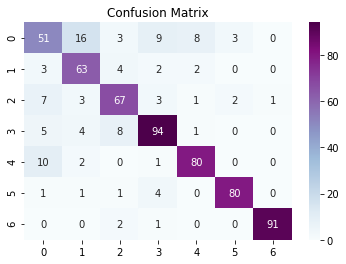

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

RandomForest = RandomForestClassifier(random_state=50)
RandomForest.fit(x_train, y_train)


y_pred = RandomForest.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

accuracyRM = accuracy_score(y_test, y_pred)

print('RANDOM FOREST \n\n')
print('Classification report (mm) : \n\n',classification_report(y_test,y_pred))
print('Accuracy : ' + str(accuracyRM))

ax = sns.heatmap(cm.T,cmap="BuPu", annot=True).set_title('Confusion Matrix');



### Bagging

BAGGING 


Classification report (mm): 

               precision    recall  f1-score   support

           0       0.57      0.61      0.59        77
           1       0.74      0.72      0.73        89
           2       0.67      0.74      0.70        85
           3       0.84      0.75      0.80       114
           4       0.88      0.88      0.88        92
           5       0.91      0.91      0.91        85
           6       0.98      0.99      0.98        92

    accuracy                           0.80       634
   macro avg       0.80      0.80      0.80       634
weighted avg       0.81      0.80      0.80       634

Accuracy : 0.8028391167192429


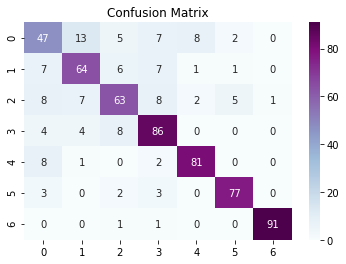

In [92]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(random_state=50)
bagging.fit(x_train, y_train)

y_pred = bagging.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracyBagging = accuracy_score(y_test, y_pred)

print('BAGGING \n\n')
print('Classification report (mm): \n\n',classification_report(y_test,y_pred))
print('Accuracy : ' + str(accuracyBagging))

ax = sns.heatmap(cm.T,cmap="BuPu", annot=True).set_title('Confusion Matrix');

### Boosing


 BOOSING, Classification Report : 

               precision    recall  f1-score   support

           0       0.54      0.69      0.61        77
           1       0.82      0.69      0.75        89
           2       0.76      0.78      0.77        85
           3       0.87      0.79      0.83       114
           4       0.91      0.90      0.91        92
           5       0.94      0.95      0.95        85
           6       0.97      0.99      0.98        92

    accuracy                           0.83       634
   macro avg       0.83      0.83      0.83       634
weighted avg       0.84      0.83      0.83       634

Accuracy : 0.8280757097791798


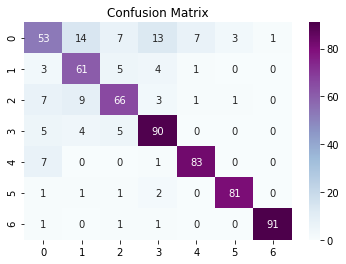

In [88]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

boosing = HistGradientBoostingClassifier(random_state=50)
boosing.fit(x_train, y_train)


y_pred = boosing.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracyBoosing = accuracy_score(y_test, y_pred)

print('\n BOOSING, Classification Report : \n\n',classification_report(y_test,y_pred))
print('Accuracy : ' + str(accuracyBoosing))

ax = sns.heatmap(cm.T,cmap="BuPu", annot=True).set_title('Confusion Matrix');

### Decision Tree


 DECISION TREE, Classification Report : 

               precision    recall  f1-score   support

           0       0.46      0.55      0.50        77
           1       0.69      0.66      0.68        89
           2       0.62      0.59      0.61        85
           3       0.85      0.73      0.78       114
           4       0.85      0.84      0.84        92
           5       0.84      0.89      0.87        85
           6       0.93      0.99      0.96        92

    accuracy                           0.75       634
   macro avg       0.75      0.75      0.75       634
weighted avg       0.76      0.75      0.76       634

Accuracy : 0.7539432176656151


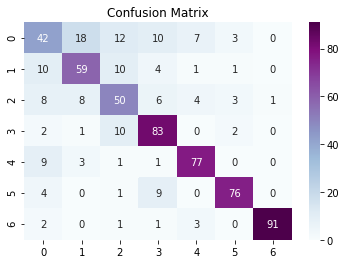

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz, plot_tree

DecisionTree = DecisionTreeClassifier(random_state=50)
DecisionTree.fit(x_train, y_train)
y_pred = DecisionTree.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
accuracyDT = accuracy_score(y_test, y_pred)

print('\n DECISION TREE, Classification Report : \n\n',classification_report(y_test,y_pred))
print('Accuracy : ' + str(accuracyDT))

ax = sns.heatmap(cm.T,cmap="BuPu", annot=True).set_title('Confusion Matrix');

### LDA


 LDA, Classification Report : 

               precision    recall  f1-score   support

           0       0.39      0.31      0.35        77
           1       0.66      0.33      0.44        89
           2       0.45      0.21      0.29        85
           3       0.46      0.61      0.52       114
           4       0.61      0.59      0.60        92
           5       0.54      0.78      0.64        85
           6       0.71      0.99      0.83        92

    accuracy                           0.55       634
   macro avg       0.55      0.54      0.52       634
weighted avg       0.55      0.55      0.53       634

Accuracy : 0.5536277602523659


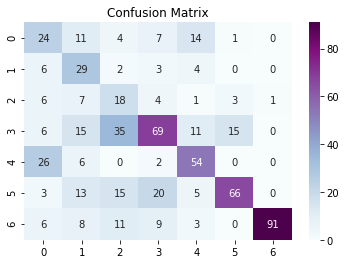

In [91]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


lda = LDA()
lda.fit(x_train, y_train)
y_pred = lda.predict(x_test)

#Matrice de confusion
cm = confusion_matrix(y_test,y_pred)
accuracyLDA = accuracy_score(y_test, y_pred)

#Affichage
print('\n LDA, Classification Report : \n\n',classification_report(y_test,y_pred))
print('Accuracy : ' + str(accuracyLDA))

ax = sns.heatmap(cm.T,cmap="BuPu", annot=True).set_title('Confusion Matrix');


### KNN


 KNN, Classification Report : 

               precision    recall  f1-score   support

           0       0.39      0.31      0.35        77
           1       0.66      0.33      0.44        89
           2       0.45      0.21      0.29        85
           3       0.46      0.61      0.52       114
           4       0.61      0.59      0.60        92
           5       0.54      0.78      0.64        85
           6       0.71      0.99      0.83        92

    accuracy                           0.55       634
   macro avg       0.55      0.54      0.52       634
weighted avg       0.55      0.55      0.53       634

Accuracy : 0.5536277602523659


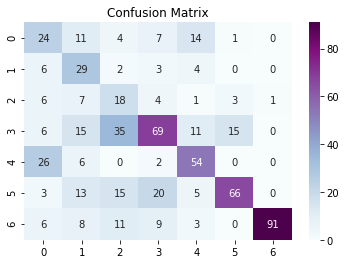

In [79]:
from sklearn.neighbors import KNeighborsClassifier


KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred = lda.predict(x_test)

#Matrice de confusion
cm = confusion_matrix(y_test,y_pred)
accuracyKNN = accuracy_score(y_test, y_pred)

#Affichage
print('\n KNN, Classification Report : \n\n',classification_report(y_test,y_pred))
print('Accuracy : ' + str(accuracyKNN))

ax = sns.heatmap(cm.T,cmap="BuPu", annot=True).set_title('Confusion Matrix');



#### On va comparer les differents modèle en fonction de leur accuracy.

[0.8296529968454258, 0.8028391167192429, 0.8280757097791798, 0.7539432176656151, 0.5536277602523659, 0.5536277602523659]


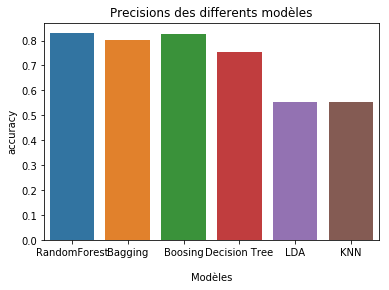

In [93]:
models = ["RandomForest", "Bagging", "Boosing", "Decision Tree","LDA", "KNN"]
accuracies = [accuracyRM, accuracyBagging,accuracyBoosing, accuracyDT, accuracyLDA, accuracyKNN]

ax = sns.barplot(x=models, y=accuracies)
plt.title('Precisions des differents modèles')
plt.xlabel("\nModèles")
plt.ylabel("accuracy")

print(accuracies)

On remarque que le meilleur modèle est le Random Forest, suivit de près par Boosing. 
Je vais donc utiliser ce modele pour mon API.
Et je vais utiliser "GridSearch"

### hyperparameter optimization

In [81]:
parametres = {'n_estimators': [5, 10, 20, 50, 100, 200, 500],
                'max_features': ['auto', 'sqrt', 'log2', None],
                'max_depth' : [1,3,4,5,6,7,8,None],
                'criterion' :['gini', 'entropy']}

n_estimators = number of trees in the foreset
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree


Bon, je n'ai pas réussi, le GridSearch n'a pas abouti ... Peut-être que j'aurai du être plus patiente. 

RandomForestClassifier(n_estimators=300, random_state=50)

# API

In [94]:
import pickle
pickle.dump(RandomForest, open('RF.pickle', 'wb'))